In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import random

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [2]:
print("My train data Shape:", train_data.shape)
print("My train labels :", train_labels.shape)
print("Maximum label : ", train_labels.max())

My train data Shape: (60000, 28, 28)
My train labels : (60000,)
Maximum label :  9


Selecteren uit de train_data en plotten

Text(0.5, 1.0, 'Trouser')

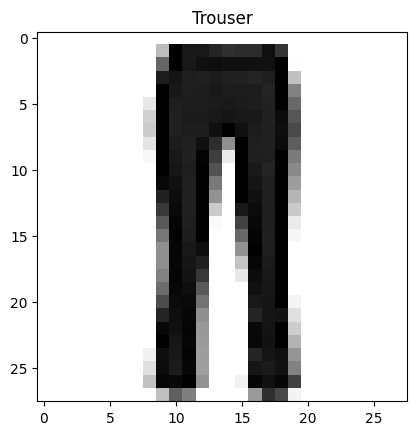

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
index_of_choice = 59635
plt.imshow(train_data[index_of_choice],cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

2D -> 1D vector <br/>
hidden layer met 4 nodes <br/>
hidden layer met 4 nodes <br/>
output layer met 10 nodes <br/>
softmax -> waarschijnlheid <br/>
<br/>
voorspelling naar True of False <br/>
Adam is een optimalisatie waardoor de leersnelheid automatisch aanpast <br/>
accuracy houdt bij hoe goed het model voorspelt naar de juiste class toe <br/>
<br/>
.fit() zorgt voor het leren van de mee gegeven 1D vectors <br/>
validation_data is een apparte dataset om bij te houden wat het model doet na elke epoch. Helpt voor het aanpassen van de performance en overfitting

In [4]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data[0].shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

non_norm_history = model_1.fit(train_data,train_labels,epochs=10,validation_data=(test_data, test_labels))

c:\Users\jdvis_x5odeao\Semester_4\DEDS_Portfolio\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1466 - loss: 2.4031 - val_accuracy: 0.2659 - val_loss: 1.7388
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2761 - loss: 1.7101 - val_accuracy: 0.2877 - val_loss: 1.6692
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2837 - loss: 1.6577 - val_accuracy: 0.2895 - val_loss: 1.6297
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2903 - loss: 1.6202 - val_accuracy: 0.3494 - val_loss: 1.4814
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3743 - loss: 1.4553 - val_accuracy: 0.3752 - val_loss: 1.4089
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3886 - loss: 1.4062 - val_accuracy: 0.4346 - val_loss: 1.3675
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4691 - loss: 1.3145 - val_accuracy: 0.5149 - val_loss: 1.2340
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4968 - loss: 1.2180 - 

In [5]:
train_data_norm = train_data / train_data.max()
test_data_norm = test_data / test_data.max()

print(train_data_norm)
print(test_data_norm)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= train_data[0].shape),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(0.001),
                metrics = ["Accuracy"])
norm_history = model.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.4180 - loss: 1.5562 - val_Accuracy: 0.6848 - val_loss: 0.9427
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.7252 - loss: 0.8515 - val_Accuracy: 0.7714 - val_loss: 0.7098
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - Accuracy: 0.7890 - loss: 0.6505 - val_Accuracy: 0.7935 - val_loss: 0.6296
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.7995 - loss: 0.5967 - val_Accuracy: 0.7971 - val_loss: 0.6032
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8039 - loss: 0.5743 - val_Accuracy: 0.7960 - val_loss: 0.5981
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8102 - loss: 0.5520 - val_Accuracy: 0.8063 - val_loss: 0.5803
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8147 - loss: 0.5373 - val_Accuracy: 0.8087 - val_loss: 0.5679
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - Accuracy: 0.8155 - loss: 0.5324 - 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7827 - loss: 0.6193
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8589 - loss: 0.3845
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8752 - loss: 0.3417
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8829 - loss: 0.3182
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8933 - loss: 0.2946
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8962 - loss: 0.2792
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9010 - loss: 0.2647
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9065 - loss: 0.2559
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9073 - loss: 0.2472
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9142 - loss: 0.2327
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


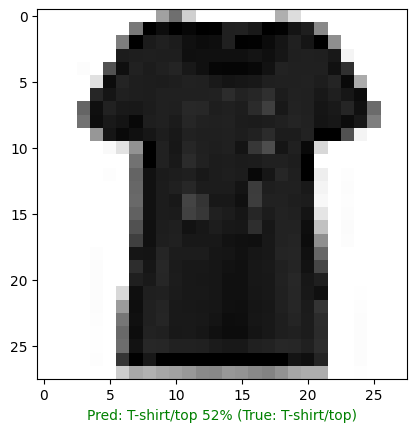

In [7]:
def plot_random_image(model, images, true_labels, classes):
  i = random.randint(0, len(images))
  image_to_predict = images[i]
  true_positive_image = classes[true_labels[i]]
  pred_probs = model.predict(tf.expand_dims(image_to_predict, axis=0))
  predicted_image = classes[pred_probs.argmax()]

  plt.imshow(image_to_predict, cmap=plt.cm.binary)
  if(predicted_image == true_positive_image):
    color = "green"
  else:
    color = "red"

  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(predicted_image,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_positive_image),color=color)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),     
    tf.keras.layers.Dense(128, activation='relu'),       
    tf.keras.layers.Dense(10, activation='softmax')       
])

model_4.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

model_4.fit(train_data_norm, train_labels, epochs=10)

plot_random_image(model_4,test_data_norm,test_labels,class_names)